## Observations and Insights 

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_data_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [135]:
# Checking the number of mice.
# mouse_data_combined['Mouse ID'].value_counts().head()
num_of_mice = mouse_data_combined_df["Mouse ID"].count()
num_of_mice

1893

In [136]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_id = mouse_data_combined_df["Mouse ID"]
time_point = mouse_data_combined_df["Timepoint"]

dup_mice_id_time_point_df = pd.DataFrame({"Mouse ID": dup_mice_id, "Timepoint":time_point})
dup_mice_id_time_point_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [137]:
# Optional: Get all the data for the duplicate mouse ID. 



In [138]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_data_combined_df.drop_duplicates(["Mouse ID"], keep= "first")
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [139]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = clean_mice_df["Mouse ID"].count()
clean_df_mice_count

249

## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_grouped = mouse_data_combined_df.groupby(["Drug Regimen"])

# Mean
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

# Median
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

# Variance
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

# Standard_dev
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

# SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                                      "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_statistics_df
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_2_df = regimen_grouped.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics_2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

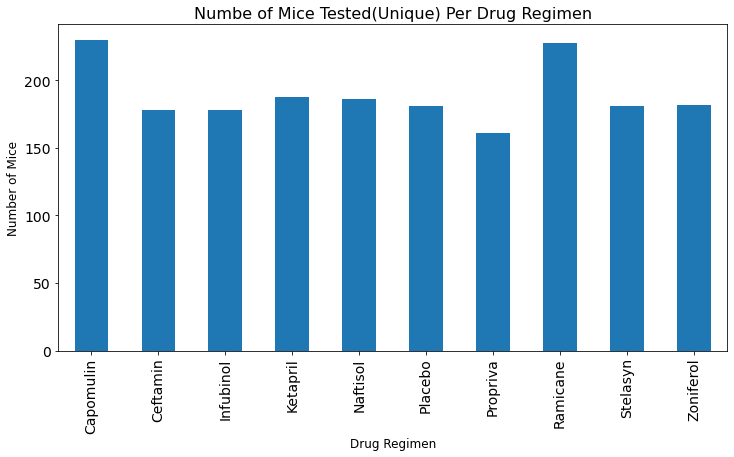

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [142]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice_tested = mouse_data_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

unique_mice_treatment_plot = unique_mice_tested.plot.bar(figsize=(12, 6), fontsize = 14)

plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
plt.title("Numbe of Mice Tested(Unique) Per Drug Regimen", fontsize=16)

plt.show()
unique_mice_tested

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

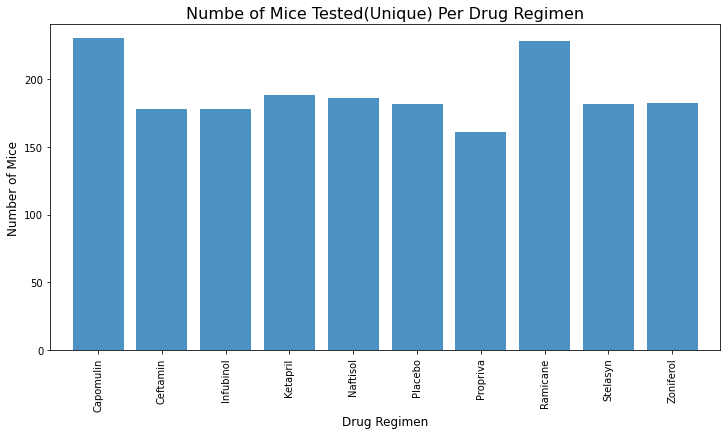

In [143]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mice_tested_py = mouse_data_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()

x_axis = np.arange(len(unique_mice_tested_py))

fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis, unique_mice_tested_py, alpha=0.8, align='center')

x_axis_loc = [value for value in x_axis]

# Label them alphabetically
plt.xticks(x_axis_loc, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                        'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(unique_mice_tested_py)+10)

plt.title("Numbe of Mice Tested(Unique) Per Drug Regimen", fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
unique_mice_tested_py


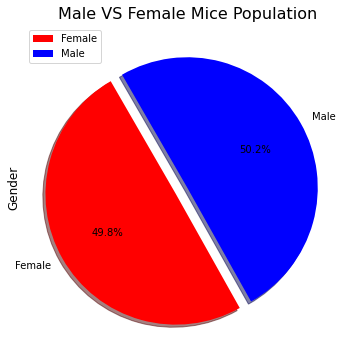

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender_groupby = mouse_data_combined_df.groupby(["Mouse ID", "Sex"])
mice_gender_groupby_df = pd.DataFrame(mice_gender_groupby.size())

mice_gender_df = pd.DataFrame(mice_gender_groupby_df.groupby(["Sex"]).count())
mice_gender_df.columns = ["Total Count"]
mice_gender_df["Percentage Of Sex"] = (100*(mice_gender_df["Total Count"]/mice_gender_df["Total Count"].sum()))
mice_gender_df["Percentage Of Sex"] = mice_gender_df["Percentage Of Sex"]

colors = ['red', 'blue']
explode = (0.1, 0)
panda_pie_plot = mice_gender_df.plot.pie(y="Total Count", figsize=(12,6), colors = colors, startangle=120, explode = explode, 
                                         shadow = True, autopct="%1.1f%%")

plt.title("Male VS Female Mice Population", fontsize = 16)
plt.ylabel("Gender", fontsize = 12)
#plt.axis("auto", fontsize = 12)
plt.show()

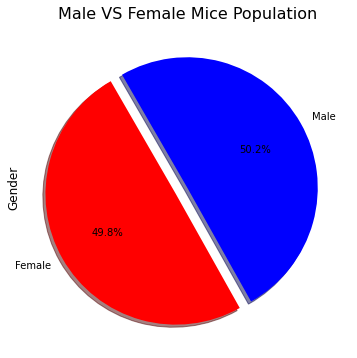

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

Mice_percentages = mice_gender_df["Percentage Of Sex"]

colors = ['red', 'blue']

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.pie(Mice_percentages, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

plt.title("Male VS Female Mice Population", fontsize = 16)
plt.ylabel("Gender", fontsize = 12)
plt.show()

## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Which df to use?
# mouse_data_combined_df
# clean_mice_df
treatments = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
treatments_list = mouse_data_combined_df.loc[mouse_data_combined_df['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse_df = treatments_list.groupby(treatments_list["Mouse ID"]).agg({'Timepoint':['max']})
last_timepoint_per_mouse_df.columns = ["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_per_mouse_df = last_timepoint_per_mouse_df.reset_index()
tumor_vol_last_timepoint_df = pd.merge(last_timepoint_per_mouse_df, mouse_data_combined_df, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_last_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes_by_drug = tumor_vol_last_timepoint_df["Tumor Volume (mm3)"].loc[tumor_vol_last_timepoint_df["Drug Regimen"] == treatment]
    
    # add subset 
    tumor_vol.append(tumor_volumes_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes_by_drug.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile = upper_quartile-lower_quartile
    lower_bound = lower_quartile - (1.5*inter_quartile)
    upper_bound = upper_quartile + (1.5*inter_quartile)
    
    # Print results to check for accuracy
    print(f"For {treatment}, Interquartile Range is {inter_quartile}")
    print(f"For {treatment} Values below {lower_bound} could be outliers.")
    print(f"For {treatment} Values above {upper_bound} could be outliers.\n")

For Capomulin, Interquartile Range is 7.781863460000004
For Capomulin Values below 20.70456164999999 could be outliers.
For Capomulin Values above 51.83201549 could be outliers.

For Ramicane, Interquartile Range is 9.098536719999998
For Ramicane Values below 17.912664470000003 could be outliers.
For Ramicane Values above 54.30681135 could be outliers.

For Infubinol, Interquartile Range is 11.477135160000003
For Infubinol Values below 36.83290494999999 could be outliers.
For Infubinol Values above 82.74144559000001 could be outliers.

For Ceftamin, Interquartile Range is 15.577752179999997
For Ceftamin Values below 25.355449580000002 could be outliers.
For Ceftamin Values above 87.66645829999999 could be outliers.



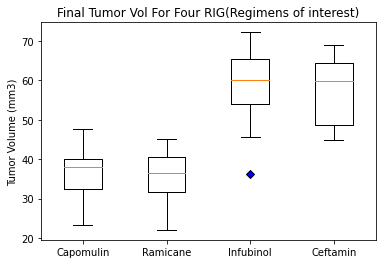

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier = dict(markerfacecolor='b', marker='D')

fig, ax = plt.subplots()
ax.set_title("Final Tumor Vol For Four RIG(Regimens of interest)")
ax.set_xticklabels(treatments)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vol, flierprops = outlier)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Average Tumor Vol')

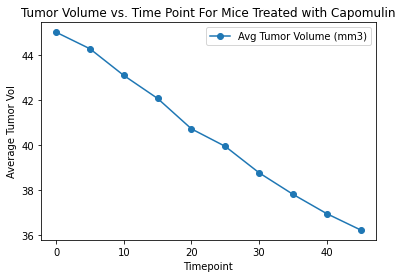

In [149]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Which df to use?
# mouse_data_combined_df
# clean_mice_df
# Basically an AVG of tumor vol for Capomulin
Capomulin_tumor_vol_vs_timepoint = mouse_data_combined_df[mouse_data_combined_df["Drug Regimen"] == 'Capomulin'].groupby(mouse_data_combined_df["Timepoint"]).agg({"Tumor Volume (mm3)":["mean"]})
Capomulin_tumor_vol_vs_timepoint.columns = ["Avg Tumor Volume (mm3)"]

ax = Capomulin_tumor_vol_vs_timepoint.plot(kind="line", title="Tumor Volume vs. Time Point For Mice Treated with Capomulin", marker="o")
ax.set_ylabel("Average Tumor Vol")

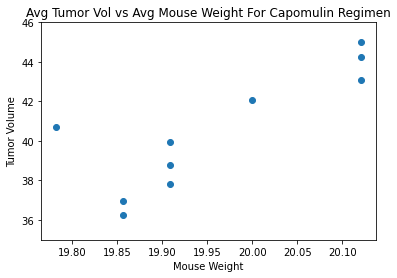

In [150]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Which df to use?
# mouse_data_combined_df
# clean_mice_df
# Basically an AVG of mouse weight and volume for Capomulin
Capomulin_tumor_vol_vs_weight = mouse_data_combined_df[mouse_data_combined_df["Drug Regimen"] == 'Capomulin'].groupby(mouse_data_combined_df["Timepoint"]).agg({"Tumor Volume (mm3)":["mean"], "Weight (g)":["mean"]})
Capomulin_tumor_vol_vs_weight.columns = ["Avg Tumor Volume (mm3)", "Avg Mouse Weight (g)"]

avg_tumor_vol = Capomulin_tumor_vol_vs_weight["Avg Tumor Volume (mm3)"]
avg_mouse_weight = Capomulin_tumor_vol_vs_weight["Avg Mouse Weight (g)"]

# Create Scatter Plot
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.title("Avg Tumor Vol vs Avg Mouse Weight For Capomulin Regimen")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

#Capomulin_tumor_vol_vs_weight
plt.show()

## Correlation and Regression

In [159]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coeff=round(st.pearsonr(Capomulin_tumor_vol_vs_weight['Avg Mouse Weight (g)'],Capomulin_tumor_vol_vs_weight['Avg Tumor Volume (mm3)'])[0],2)

# Print the correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {correlation_coeff}")

The correlation between mouse weight and average tumor volume is 0.82


In [165]:
x_values = Capomulin_tumor_vol_vs_weight["Avg Mouse Weight (g)"]
y_values = Capomulin_tumor_vol_vs_weight["Avg Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print out regression statistics
print(f'The linear regression equation is {line_equation}')
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation_coeff}")
print(f"stderr:{stderr}")


The linear regression equation is y = 20.29x + -364.52
slope:20.29263156735521
intercept:-364.5237130118514
rvalue (Correlation coefficient):0.8207292487213748
pandas (Correlation coefficient):0.82
stderr:4.994256801613102


The r-squared is: 0.6735964997067523


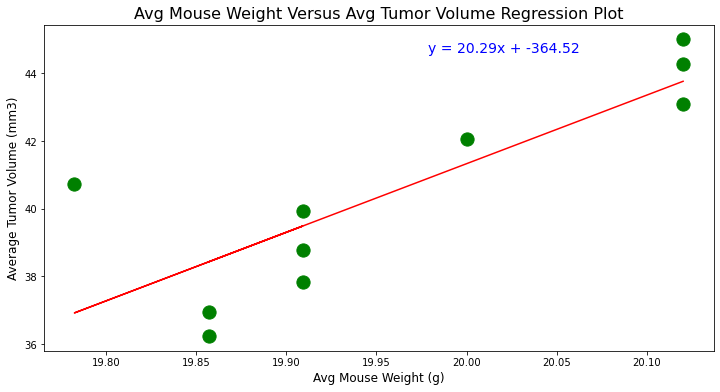

In [171]:
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.scatter(x_values,y_values,s=175, color="green")

plt.plot(x_values,regress_values,"r-")
plt.title('Avg Mouse Weight Versus Avg Tumor Volume Regression Plot',fontsize =16)
plt.xlabel('Avg Mouse Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =12)
ax1.annotate(line_equation, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction', horizontalalignment='right', verticalalignment='top',fontsize=14,color="blue")

print(f"The r-squared is: {rvalue**2}")
plt.show()